In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
  value="Click here to toggle on/off the raw code."></form>''')

#### Integrated Hydrology

This is a series of problems to test and demonstrate the integrated hydrology components of ATS.  Integrated hydrology consists of Richards equation in the subsurface coupled to a diffusion wave approximation on the surface system.  Coupling is done through assuming continuous pressure and flux across the surface-subsurface interface.

Tests demonstrate a 1D column (showing dry-to-wet and wet-to-dry transitions), a 2D "open book" problem (showing that water flows down hill) and a typical 2D "hillslope" problem comparable to the Sulis et al (WRR) benchmark problems.

Author: Ethan Coon

In [2]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf, parse_ats
import column_data, transect_data
import colors
import mesh
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colorbar

In the first example, we rain on a column for half a day, then turn off the rain.  A continuous, constant baseflow is applied as a sink at the bottom of the column.  Initially the column is partially saturated.  As rainfall > baseflow, the column saturates and ponded water expresses on the surface.  After rainfall stops, baseflow takes the water table below the surface again. 

This demonstrates reasonable performance in the dry-to-wet and wet-to-dry transitions.

In [3]:
# load the ATS solution
directory = "integrated_hydro-column.regression.gold"

dat = column_data.column_data(["saturation_liquid"], directory=directory)
keys, times, dats = parse_ats.readATS(directory, "visdump_surface_data.h5", timeunits='d')
pd = parse_ats.getSurfaceData(keys, dats, "ponded_depth")



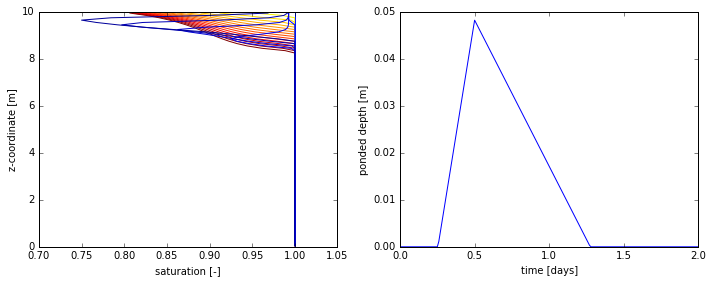

In [4]:
# plot the solution
z = dat[0,0,:]
cm = colors.cm_mapper(0,dat.shape[1]-1) # color the plots as a function of time
fig, axs = plt.subplots(1,2, figsize=(10,4))

for i in range(dat.shape[1]-1,0,-5):
    axs[0].plot(dat[1,i,:],z, color=cm(i))

axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z-coordinate [m]')
axs[0].set_xlim(0.7,1.05)

axs[1].plot(times, pd)
axs[1].set_xlabel("time [days]")
axs[1].set_ylabel("ponded depth [m]")

plt.tight_layout()
plt.show()

In the next example, we simply rain on a V-catchment in 2D, allowing the water to pond.  This simply demonstrates that water runs downhill (in a coupled environment).  Plots show saturation (in colors) and the ponded depth (a line above the catchment).  

At time zero, a water table is established.  Infiltration occurs through the 30 hour plot.  By 60 hours, the domain is saturated and water is ponding on the surface.

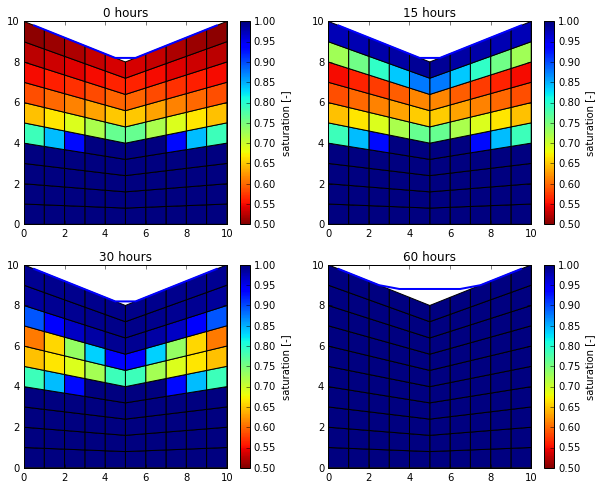

In [24]:
directory = "integrated_hydro-v.regression.gold"

keys, times, dat = parse_ats.readATS(directory, "visdump_data.h5", timeunits='d')
dats = column_data.column_data(['ponded_depth.cell.0','elevation.cell.0'], 
                               directory=directory, filename="visdump_surface_data.h5", 
                               mesh_filename="visdump_surface_mesh.h5", coord=0)

fig, axs = plt.subplots(2,2,figsize=(10,8))

def plot(i, ax):
    cax = colorbar.make_axes(ax, 'right')[0]
    cax.set_ylabel("saturation [-]")

    transect_data.plot(dat["saturation_liquid.cell.0"][keys[i]][:,0], ax, cax,
                       0.5, 1.0, directory=directory, cmap="jet_r", label="saturation [-]")
    ax.plot(dats[0,0,:], dats[1,i,:]+dats[2,i,:], 'b', linewidth=2)
    ax.set_title("{0} hours".format(3*i))
    
plot(0, axs[0,0])
plot(5, axs[0,1])
plot(10, axs[1,0])
plot(20, axs[1,1])

For the final example, we demonstrate a typical hillslope problem, showing runoff at the bottom of the hillslope.  This problem is taken from Sulis et al, AWR 2010.

In [ ]:
#not done yet!